# Project: No_show appointment Dataset Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the No_show appointment dataset.

It collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

I want to explore which factors have the most effect on appearing or not appearing on the specified appointment.
I particulary want to explore those factors:

1- Gender, does the patients gender affect their appearence or not?

2- Scholarsip, does having a scholrship make it much probaple to attend the appointment or not?

3- Day of week, does apperance depend on whether it is a weekday or weekend?

4- Does having illness history affect patient apperance?


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#upload our dataset and explore its features
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#explore our dataset for null or missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Note: There is no missing data_points in our set.

In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

In [3]:
#Removing unwanted data .. we don't need patientid and appointmentid
df.drop(['PatientId', 'AppointmentID'], axis =1, inplace = True)

In [4]:
#Renaming columns to have all the headers in lowercase to avoid confusing
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [5]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Replace yes and no by absent and attend respectively in no_show column to avoid cnofusing
df['no_show'].replace({'No': 'attend', 'Yes': 'absent'}, inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,attend
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,attend
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,attend
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,attend
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,attend


In [7]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [5]:
#Remove age less than 0 .. they don't make any sense 
df.drop(df[df.age < 0].index, inplace = True)

In [9]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

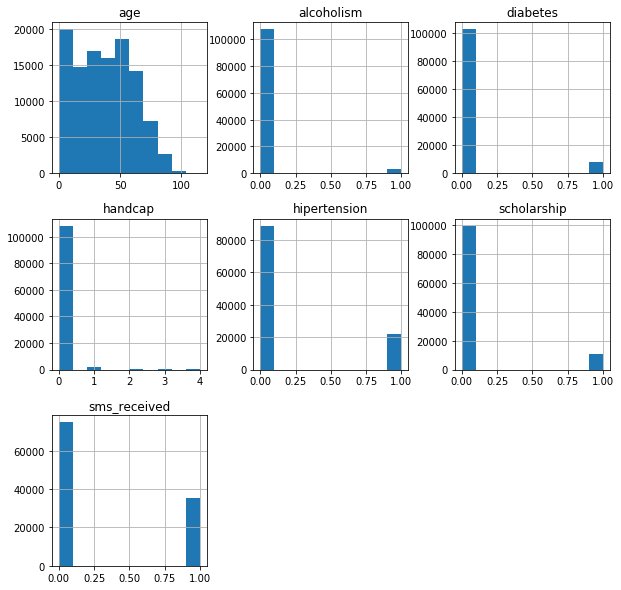

In [10]:
df.hist(figsize = (10, 10));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( Gender, does the patients gender affect their appearence or not?)

In [6]:
def plot_bar(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by '+ variable + ' Showing Up')
    plt.xlabel(variable)
    plt.ylabel('Count');

In [43]:
def plot_pie(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='pie', title = 'Counts by '+ variable + ' Showing Up', autopct='%1.1f%%', figsize = (10, 10))
    plt.ylabel('');

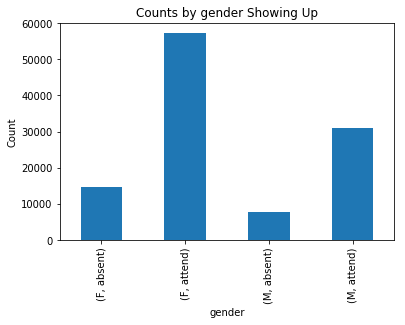

In [48]:
plot_bar('gender')

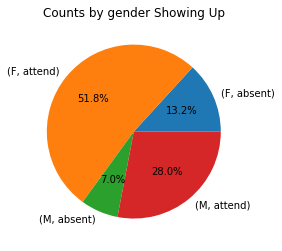

In [26]:
plot_pie('gender')

Note: It looks like that females are more present to their appointments, maybe needs to explore more.

In [49]:
gender_df = df.groupby(['gender']).count()['age']
gender_df

gender
F    71839
M    38687
Name: age, dtype: int64

Note: Females are aproximately double the males .. now tha differnce make more sense.

### Research Question 2  (Scholarsip, does having a scholrship make it much probaple to attend the appointment or not?)

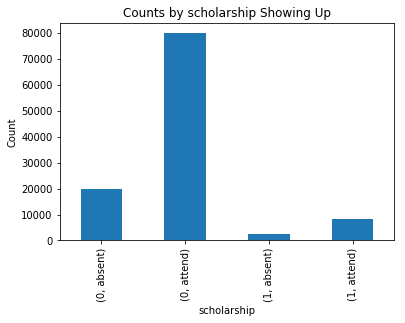

In [50]:
plot_bar('scholarship')

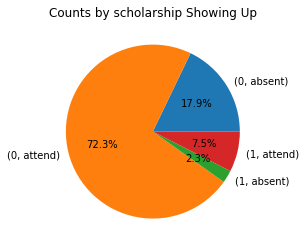

In [27]:
plot_pie('scholarship')

Note: It doesn't seem that having a scholarship affects the attendancy probability.

### Research Question 3  (Day of week, does apperance depend on whether it is a weekday or weekend?)

In [13]:
#Change the appointmentdate data type to date
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [14]:
#Add a new column to figure the day of week for each appointment
df['week_day'] = df['appointmentday'].dt.dayofweek

In [15]:
weekday_df = df.groupby(['week_day']).count()['age']
weekday_df

week_day
0    22714
1    25640
2    25867
3    17247
4    19019
5       39
Name: age, dtype: int64

Text(0, 0.5, 'Total number of appointments')

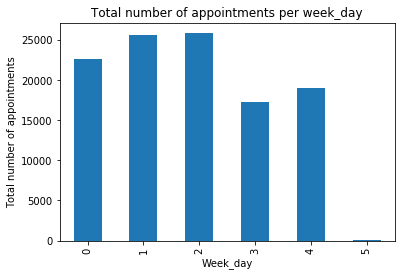

In [16]:
weekday_df.plot(kind = 'bar', title = 'Total number of appointments per week_day')
plt.xlabel('Week_day')
plt.ylabel('Total number of appointments')

Note: It looks like Wendesday and Tuesday respectively have the most appointments

As general, there are no appointments scheduled on weekends

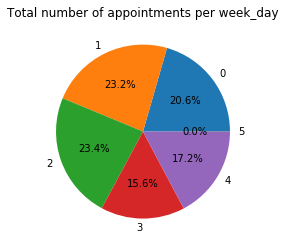

In [29]:
weekday_df.plot(kind = 'pie', title = 'Total number of appointments per week_day', autopct='%1.1f%%')
plt.ylabel('');

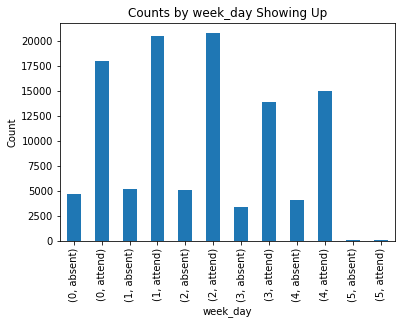

In [40]:
plot_bar('week_day')

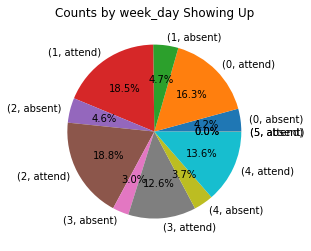

In [30]:
plot_pie('week_day')

Note: Again Wendesday and Tuesday respectively have the most attending rates

### Research Question 4  ( Does having illness history affect patient apperance?)

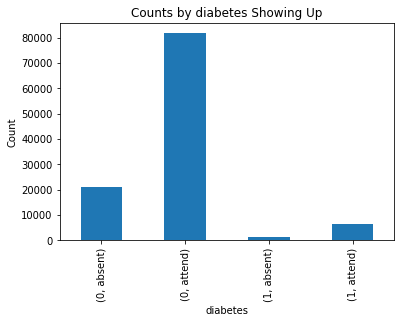

In [29]:
plot_bar('diabetes')

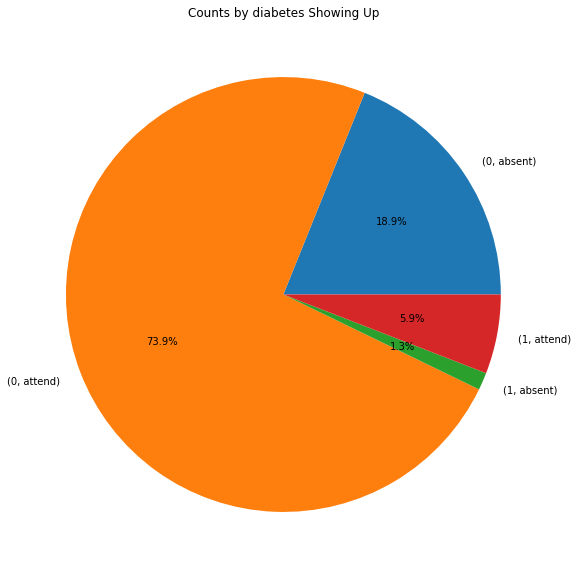

In [49]:
plot_pie('diabetes')

Note: It looks that having diabetes makes it more likey to show up

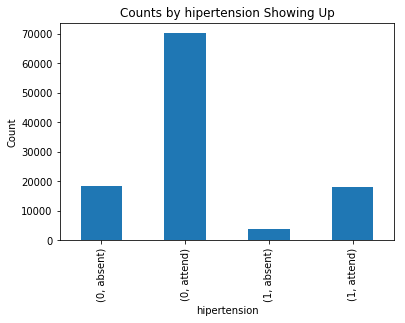

In [30]:
plot_bar('hipertension')

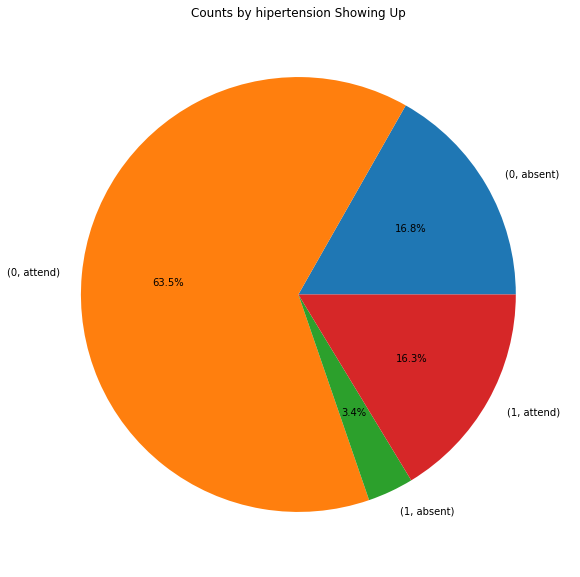

In [48]:
plot_pie('hipertension')

Note: It looks that having hipertension makes it more likey to show up

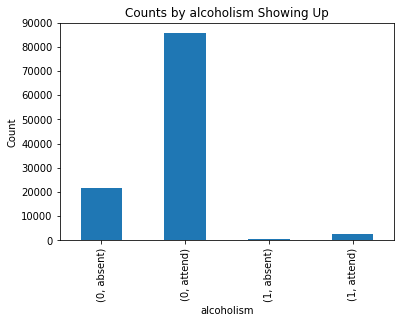

In [33]:
plot_bar('alcoholism')

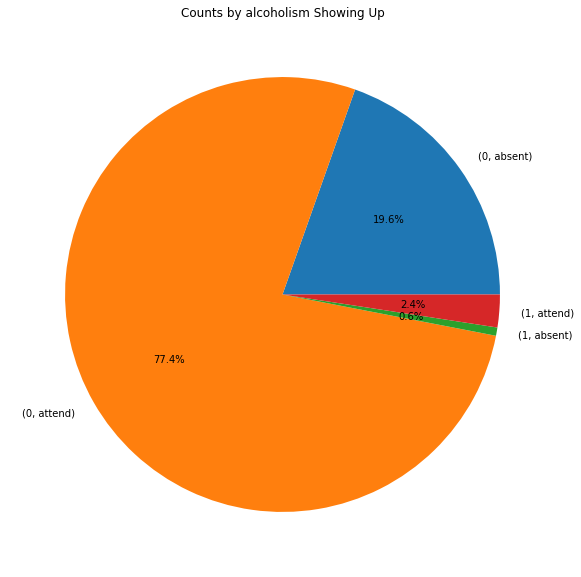

In [47]:
plot_pie('alcoholism')

Note: It looks that having alcoholism history makes it strong likey to show up

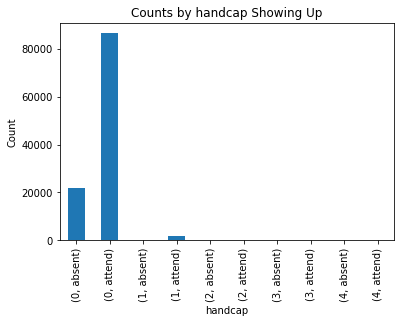

In [32]:
plot_bar('handcap')

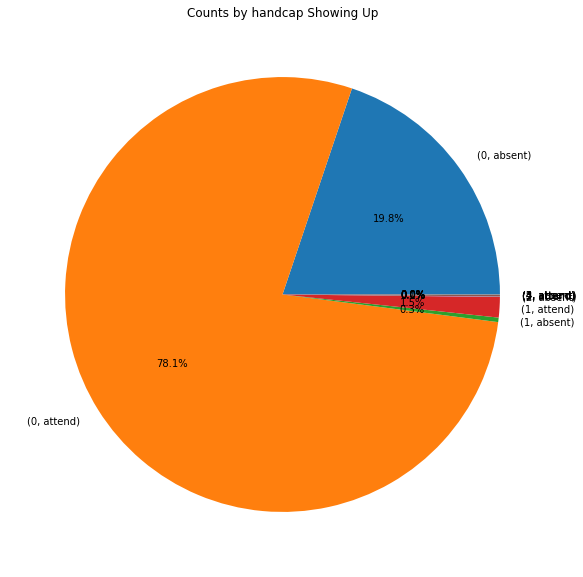

In [44]:
plot_pie('handcap')

Note: It looks that being handcap makes it strong likey to show up

### Note: It seems that having an illness history positively correlates with showing up to the appointment.

### Data Limitations:

There were no limitations in the dataset ... no missing values 

Tha data was sufficient to run the analysis process

<a id='conclusions'></a>
## Conclusions

These are the most significant results I got:

1- Wendesday and Tuesday respectively have the highset attending rates.

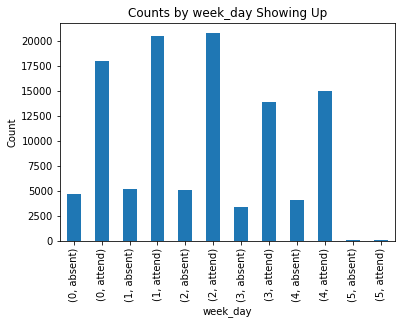

In [54]:
plot_bar('week_day')

2- Having an illness history increases the probability of showing up at the appointment.

It seems to be the most strong variable at shpwing up process.

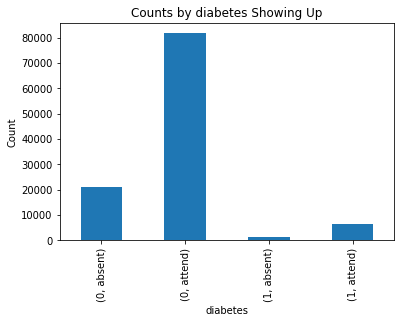

In [55]:
plot_pie('diabetes')

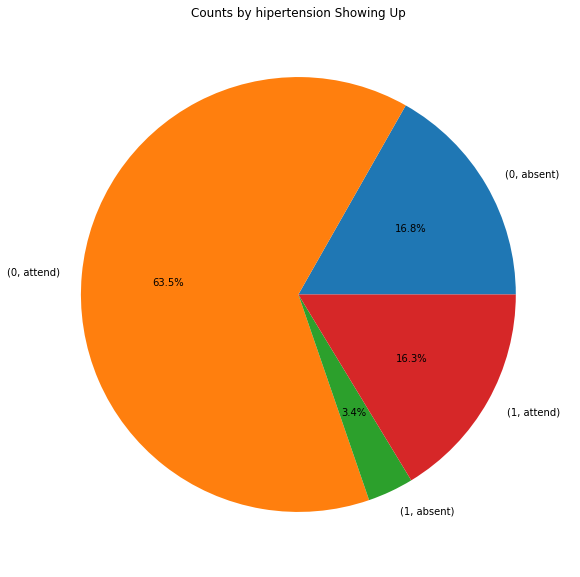

In [46]:
plot_pie('hipertension')

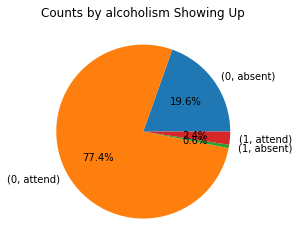

In [39]:
plot_pie('alcoholism')

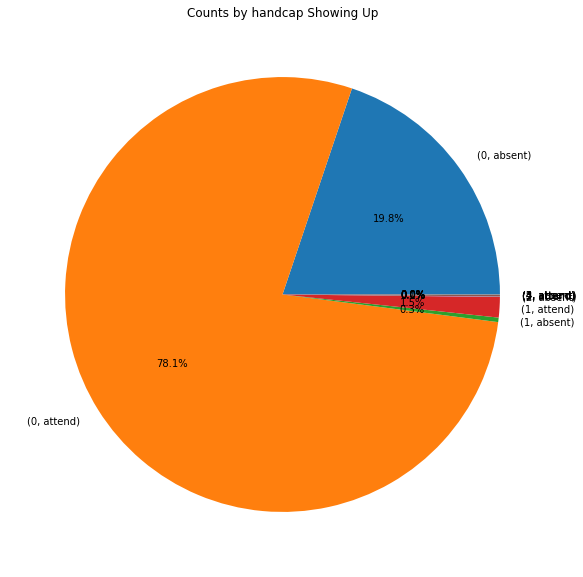

In [45]:
plot_pie('handcap')

3- Womens attend there appointments more than men.

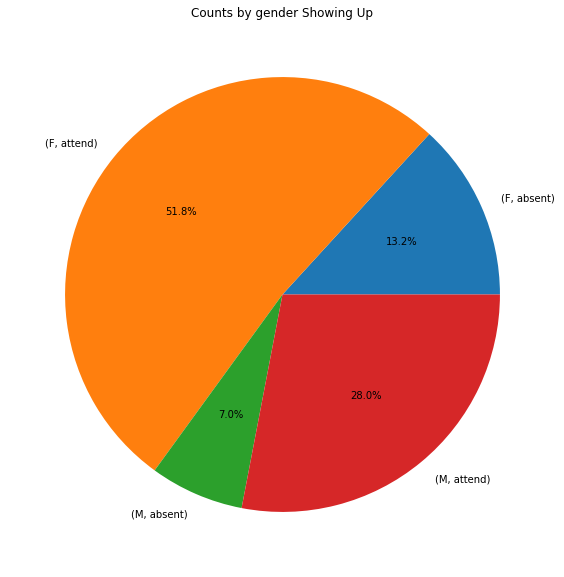

In [50]:
plot_pie('gender')